In [1]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

/home/masoud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [4]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [5]:
image_arr = image.read()

In [8]:
np.shape(image_arr)

(1, 10800, 21600)

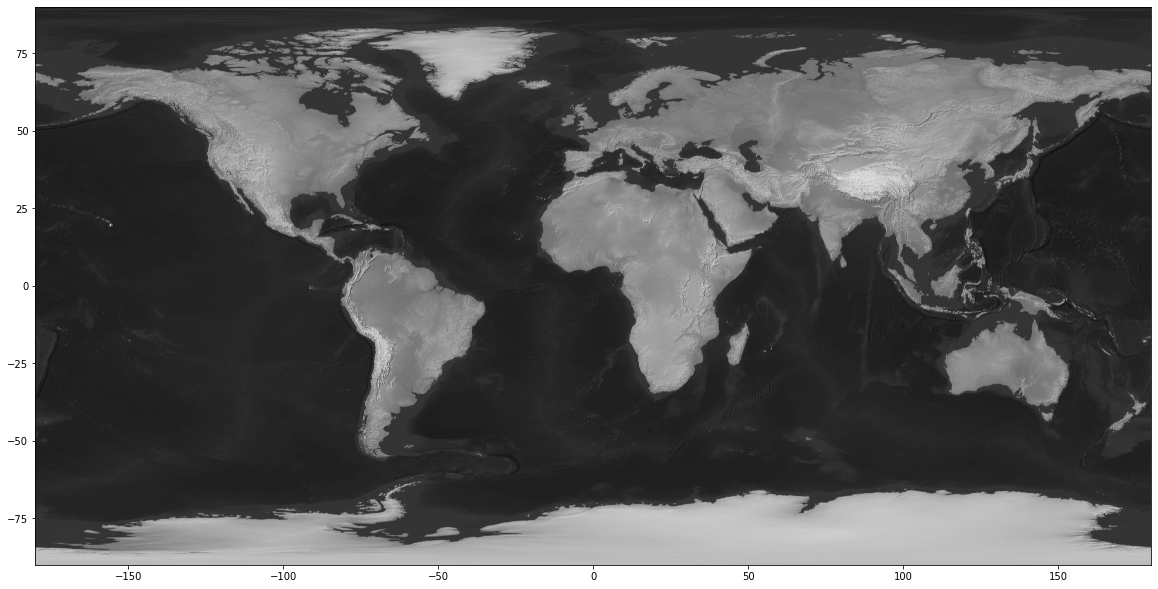

In [9]:
plt.figure(figsize=(20, 20))
show(image, cmap='gray')
plt.show()

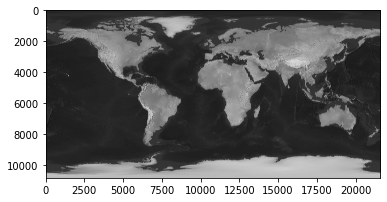

In [26]:
plt.imshow(image_arr[0], cmap='gray')

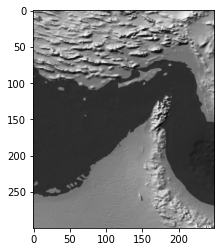

In [31]:
plt.imshow(image_arr[0][3000:4000, 13000:15000][700:, 1000:1250], cmap='gray')

In [32]:
hormoz_image = image_arr[0][3000:4000, 13000:15000][700:, 1000:1250]

In [33]:
np.shape(hormoz_image)

(300, 250)

In [34]:
hormoz_cls = np.empty(np.shape(hormoz_image))
hormoz_cls

array([[6.91255053e-310, 4.68414108e-310, 0.00000000e+000, ...,
        6.91246284e-310, 6.91246284e-310, 6.91246284e-310],
       [6.91246284e-310, 6.91246284e-310, 6.91246284e-310, ...,
        6.91246284e-310, 6.91246284e-310, 6.91246284e-310],
       [6.91246284e-310, 6.91246284e-310, 6.91246284e-310, ...,
        6.91246285e-310, 6.91246285e-310, 6.91246285e-310],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.44728039e-314, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [42]:
hormoz_flattern = hormoz_image.reshape(-1)

In [43]:
hormoz_flattern.shape

(75000,)

In [45]:
from sklearn.feature_extraction import image

In [50]:
image.img_to_graph(hormoz_image).todense()

matrix([[214, 252,   0, ...,   0,   0,   0],
        [252, 218,   2, ...,   0,   0,   0],
        [  0,   2, 216, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 149,  11,   0],
        [  0,   0,   0, ...,  11, 138, 237],
        [  0,   0,   0, ...,   0, 237, 157]], dtype=uint8)

In [53]:
sample_image = [
    [10, 20, 30, 30],
    [20, 10, 30, 60],
    [40, 100, 120, 250],
]
image.img_to_graph(sample_image).todense()

matrix([[ 10,  10,   0,   0,  10,   0,   0,   0,   0,   0,   0,   0],
        [ 10,  20,  10,   0,   0,  10,   0,   0,   0,   0,   0,   0],
        [  0,  10,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  30,   0,   0,   0,  30,   0,   0,   0,   0],
        [ 10,   0,   0,   0,  20,  10,   0,   0,  20,   0,   0,   0],
        [  0,  10,   0,   0,  10,  10,  20,   0,   0,  90,   0,   0],
        [  0,   0,   0,   0,   0,  20,  30,  30,   0,   0,  90,   0],
        [  0,   0,   0,  30,   0,   0,  30,  60,   0,   0,   0, 190],
        [  0,   0,   0,   0,  20,   0,   0,   0,  40,  60,   0,   0],
        [  0,   0,   0,   0,   0,  90,   0,   0,  60, 100,  20,   0],
        [  0,   0,   0,   0,   0,   0,  90,   0,   0,  20, 120, 130],
        [  0,   0,   0,   0,   0,   0,   0, 190,   0,   0, 130, 250]])

In [54]:
cm = image.img_to_graph(hormoz_image)

In [79]:
kmeans = KMeans(n_clusters=2, max_iter=3000)
kmeans.fit(cm)

KMeans(max_iter=3000, n_clusters=2)

In [80]:
labels = kmeans.labels_

In [81]:
np.unique(labels, return_counts=True)

(array([0, 1], dtype=int32), array([74994,     6]))

In [62]:
labels_im = np.full(hormoz_cls.shape, -1.)

In [65]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [68]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [69]:
labels_im

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
hormoz_image

array([[214, 218, 216, ..., 159, 158, 159],
       [211, 206, 190, ..., 159, 159, 160],
       [194, 169, 135, ..., 160, 160, 160],
       ...,
       [156, 156, 156, ..., 168, 176, 151],
       [155, 155, 154, ..., 120, 150, 170],
       [154, 155, 153, ..., 149, 138, 157]], dtype=uint8)

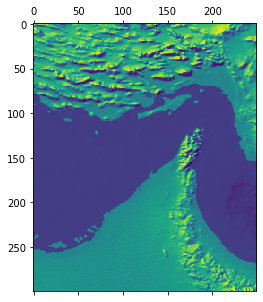

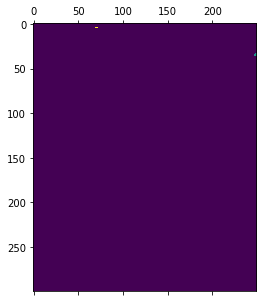

In [72]:
plt.matshow(hormoz_image)
plt.matshow(labels_im)

In [73]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(cm)

DBSCAN()

In [74]:
labels = dbscan.labels_

In [75]:
np.unique(labels, return_counts=True)

(array([-1]), array([75000]))